In [ ]:
# word2Vec (Word to Vector): 단어를 희소한 형태(One-Hot) 대신,
# 주변 단어와의 관계(문맥)를 학습하여 의미를 반영한 '저차원의 밀집 벡터(Dense Vector)'로 표현하는 모델
# Word2Vec은 딥러닝 기반의 '단어 임베딩(Word Embedding)' 모델의 시초
!pip install gensim # Gensim 라이브러리 설치 (Word2Vec을 쉽게 사용할 수 있게 해줌)

In [ ]:
from gensim.models import Word2Vec
# 학습 데이터: 문맥적 유사성이 있는 단어들을 포함하는 문장 리스트
sentences= [['king', 'queen', 'man', 'woman'], ['apple', 'banana', 'fruit']]
# Word2Vec 모델 학습
model = Word2Vec(
    sentences=sentences, # 학습에 사용할 문장 리스트 (토큰화된 상태)
    vector_size=10, # 임베딩 벡터의 차원 (Word2Vec의 핵심 매개변수. One-Hot과 달리 저차원 밀집 벡터를 만듦)
    window=2, # 문맥 윈도우 크기. 타겟 단어 앞뒤로 몇 개의 단어를 볼 것인지 결정
    min_count=1, # 최소 빈도. 최소 1번 이상 등장한 단어만 학습에 사용
    sg=1 # 모델 학습 방법: 1은 Skip-gram, 0은 CBOW (Continuous Bag of Words)
)
# sg=1 (Skip-gram): 타겟 단어(중심)로 주변 단어(문맥)를 예측하여 학습 (일반적으로 성능이 더 좋음)
# sg=0 (CBOW): 주변 단어(문맥)들로 타겟 단어(중심)를 예측하여 학습 (일반적으로 학습 속도가 더 빠름)

print(model.wv['apple'])  # 'apple' 단어에 해당하는 10차원 임베딩 벡터를 확인
print(model.wv.similarity('king', 'queen')) # 코사인 유사도(Cosine Similarity) 계산 결과 (두 벡터가 얼마나 비슷한 방향을 향하는가)
print(model.wv.similarity('king', 'apple')) # 결과: 의미가 관련 없는 단어 ('king', 'apple')는 낮은 유사도를 가짐
print(model.wv.similarity('banana', 'apple')) # 결과: 같은 범주('fruit')의 단어는 높은 유사도를 가짐 (Word2Vec의 핵심 기능)



[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350891 -0.03405366
 -0.00946401  0.05768573 -0.07521638 -0.03936104]
-0.042645365
-0.08937527
0.32937223


In [ ]:
sentences2 = [['python', 'lan', 'program', 'computer', 'say']] # 확률적 경사하강법 씀 # 새로운 학습 데이터 (단어 수는 5개)
# vector_size=50으로 설정하여 더 고차원의 임베딩 벡터를 만듦
model2 = Word2Vec(sentences=sentences2, vector_size=50, window=2, min_count=1, sg=1, alpha=0.025)
# alpha=0.025: 초기 학습률(Learning Rate). Word2Vec은 내부적으로
# SGD (Stochastic Gradient Descent, 확률적 경사하강법)를 이용해 손실을 최소화하는 방식으로 학습.


print(model2.wv['python'])  #벡터화 결과 확인('python'단어의 50차원 벡터 확인) , # wv (Word Vectors): 학습된 단어 벡터들을 저장하는 객체 (KeyedVectors)
print(model2.wv) #keyedvectors<vetcor size=50, 5keys>
print('인덱스 사전 :', model2.wv.key_to_index)  # 단어와 부여된 정수 인덱스(레이블) 매핑 확인
# (key_to_index는 단어 사전을 관리하며, 내부적으로는 Label Encoding과 유사)
print('keys :', model2.wv.key_to_index.keys())  # 단어 사전(Vocabulary) 리스트
print('values :', model2.wv.key_to_index.values())  # 각 단어의 정수 인덱스

print()
vocabs=model2.wv.key_to_index.keys() #단어 사전 기억
# 모든 단어의 임베딩 벡터를 리스트로 저장 (PCA를 위해 필요)
wordvect_list = [model2.wv[i] for i in vocabs]
print(wordvect_list)
print(len(wordvect_list[0]))  # 임베딩 벡터의 차원 확인 (50)
print(wordvect_list[0])
# 학습된 단어들 간의 코사인 유사도 확인
print(model2.wv.similarity(w1='python', w2='lan'))

[ 0.00018913  0.00615464 -0.01362529 -0.00275093  0.01533716  0.01469282
 -0.00734659  0.0052854  -0.01663426  0.01241097 -0.00927464 -0.00632821
  0.01862271  0.00174677  0.01498141 -0.01214813  0.01032101  0.01984565
 -0.01691478 -0.01027138 -0.01412967 -0.0097253  -0.00755713 -0.0170724
  0.01591121 -0.00968788  0.01684723  0.01052514 -0.01310005  0.00791574
  0.0109403  -0.01485307 -0.01481144 -0.00495046 -0.01725145 -0.00316314
 -0.00080687  0.00659937  0.00288376 -0.00176284 -0.01118812  0.00346073
 -0.00179474  0.01358738  0.00794718  0.00905894  0.00286861 -0.00539971
 -0.00873363 -0.00206415]
KeyedVectors<vector_size=50, 5 keys>
인덱스 사전 : {'say': 0, 'computer': 1, 'program': 2, 'lan': 3, 'python': 4}
keys : dict_keys(['say', 'computer', 'program', 'lan', 'python'])
values : dict_values([0, 1, 2, 3, 4])

[array([-1.0724545e-03,  4.7286271e-04,  1.0206699e-02,  1.8018546e-02,
       -1.8605899e-02, -1.4233618e-02,  1.2917745e-02,  1.7945977e-02,
       -1.0030856e-02, -7.5267432e

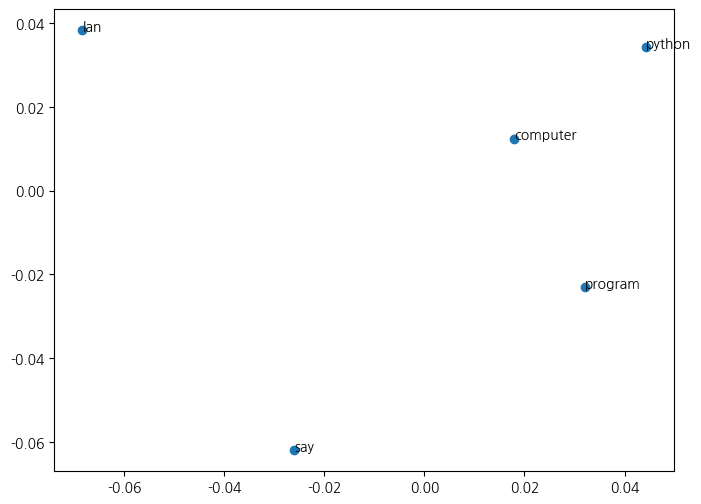

78.11165468788266
'python'기준 단어별 코사인 유사도 

program   ■■■■■■■■■■■          (ps:0.166)
computer  ■■■■■■■■■■■          (ps:0.125)
say       ■■■■■■■■             (ps:-0.118)
lan       ■■■■■■■              (ps:-0.206)


In [ ]:
# 시각화 (Word Embedding을 저차원으로 투영하여 시각적으로 확인)
# !pip install koreanize-matplotlib # 한글 폰트 깨짐 방지 라이브러리 설치
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plotFunc(vocabs, x, y):
  plt.figure(figsize=(8,6))
  plt.scatter(x, y) # 2차원 공간에 점으로 단어 벡터를 표현
  for i, v in enumerate(vocabs):
    plt.annotate(v, xy=(x[i], y[i]))  # 각 점 위에 해당 단어 텍스트(v)를 표시


from sklearn.decomposition import PCA
# PCA (Principal Component Analysis, 주성분 분석): 비지도 학습 방법론 중 하나로,고차원 데이터를 정보 손실을 최소화하며 저차원으로 압축
# 'Clustering/K-means, GMM/PCA- 공분산 행렬'의 PCA를 여기에 활용
pca = PCA(n_components=2) # 50차원 벡터를 2차원(x, y)으로 축소
xytrans = pca.fit_transform(wordvect_list)  # 50차원 -> 2차원 변환
xs = xytrans[:,0] # x좌표 (첫 번째 주성분)
ys = xytrans[:,1] # y좌표 (두 번째 주성분)
plotFunc(vocabs, xs, ys)
plt.show()  # 결과: 의미적으로 가까운 단어는 2차원 평면에서도 가깝게 위치하는 경향을 보여야 함

import numpy as np
# 코사인 유사도와 각도의 관계 확인: cos(theta) = 유사도
# 코사인 유사도(s)를 각도(theta)로 변환: theta = arccos(s)
print(np.degrees(np.arccos(0.20600514)))  # 예시 유사도 0.20600514가 몇 도인지 계산

# 유사도 순으로 정렬해서 가까움 정도를 텍스트로 표현 (시각화 보조)
target = 'python' # target('python') 단어와 다른 모든 단어 간의 유사도 계산
sim = {w:model2.wv.similarity(target, w) for w in vocabs if w!=target}
# 유사도(s)가 높은 순서대로 딕셔너리 항목을 정렬
sort_sim = sorted(sim.items(), key=lambda x:x[1], reverse=True)
print(f"'{target}'기준 단어별 코사인 유사도 \n")
for word, s in sort_sim:
  bar = '■' * int((s+1)*10) # 유사도에 따라 막대 길이 조절 (s가 -1~1 사이이므로 +1을 해 0~2 사이로 만듦)
  print(f"{word:<10}{bar:20} (ps:{s:.3f})") # 결과: 'python'과 문맥적으로 가장 가까운 단어부터 순서대로 출력됨

꼭 알아야 할 핵심 정리 (딥러닝 학습과의 연관성)

Word Embedding의 기본 원리를 이해.

이는 텍스트를 위한 딥러닝(CNN, RNN, 트랜스포머)의 가장 중요한 첫 번째 레이어에 해당.

1. 임베딩 벡터의 중요성Word2Vec의 목표: 단어 자체를 벡터로 표현하는 것이 아니라, 단어가 등장하는 '문맥(Context)'을 학습하여 벡터를 만듦.

    효과 : king - man + woman $\approx$ queen과 같은 단어의 의미적/문법적 관계를 벡터의 사칙연산으로 표현

    One-Hot과의 차이 : One-Hot: 희소(Sparse), 고차원, 의미 없음./
    Word2Vec: 밀집(Dense), 저차원 (ex: 50, 100), 의미 반영.
    
  2. Word2Vec 학습 원리 (SGD 및 딥러닝 연결)
  
      학습 방식: Word2Vec은 단일 은닉층(Single Hidden Layer)을 가진 얕은 신경망 구조를 사용.
      
      SGD 활용: 확률적 경사하강법(SGD)을 사용하여, 예측 오차(손실)를 최소화하는 방향으로 가중치 행렬을 업데이트.
      이 업데이트된 가중치 행렬 자체가 우리가 사용하는 임베딩 벡터 됨.
      
      즉, 딥러닝 모델을 학습시키는 과정과 동일!
      
  
  3. PCA의 활용 (비지도 학습 연결)
  
      PCA 역할:  50차원 벡터를 사람이 볼 수 있도록 2차원으로 압축하기 위해 비지도 학습 기법인 PCA를 사용.
      
      의미: PCA를 통해 시각화된 결과에서 가까운 단어끼리 모여 있다면, Word2Vec 학습이 성공적이었으며 벡터 간의 의미적 유사성이 잘 반영되었다는 것을 시각적으로 입증하는 근거가 됨.
      
  4. 코사인 유사도 (Similarity)정의: 두 벡터 사이의 각도 $\theta$에 대한 코사인 값($\cos\theta$).
      
      특징: 벡터의 크기(Magnitude)는 무시하고 방향(Direction)만 측정하기 때문에, 텍스트 분석에서 의미적 유사성을 측정하는 표준 방법으로 사용.
      
      $\text{유사도} = 1$: 완벽하게 일치 (각도 $0^\circ$)$\text{유사도} = 0$: 직교 (각도 $90^\circ$, 무관함)$\text{유사도} = -1$: 완벽하게 반대 (각도 $180^\circ$)